<a href="https://colab.research.google.com/github/laredein/NeuralNetworks/blob/master/XORPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
inp=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float)
out=torch.tensor([0,0,0,1],dtype=torch.float)
def decisionboundary(model):
    x_span=np.linspace(0,1,20)
    y_span=np.linspace(0,1,20)
    xx,yy=np.meshgrid(x_span, y_span)
    labels=model(torch.tensor(np.c_[xx.ravel(), yy.ravel()],dtype=torch.float))
    labels=labels.detach().numpy()
    z=labels.reshape(xx.shape)
    ax=plt.subplots()[1]
    ax.contourf(xx,yy,z)
    plt.show()

In [2]:
layers=[]
layers.append(nn.Linear(2,1))
layers.append(nn.Sigmoid())
andmodel=nn.Sequential(*layers)
loss=nn.MSELoss()
optimizer=optim.SGD(andmodel.parameters(),lr=1.5,momentum=0.3)
for epoch in range(300):
    for j in range(4):
        optimizer.zero_grad()
        ourout=andmodel(inp[j])
        curlos=loss(ourout,out[j])
        curlos.backward()
        optimizer.step()
print(andmodel(inp))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[1.4223e-04],
        [4.6957e-02],
        [4.7263e-02],
        [9.4500e-01]], grad_fn=<SigmoidBackward>)


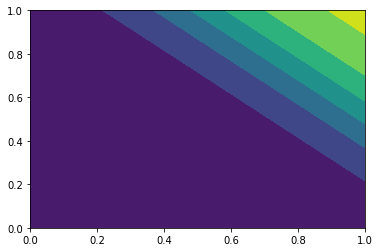

In [3]:
decisionboundary(andmodel)

In [4]:
inp=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float)
out=torch.tensor([0,1,1,0],dtype=torch.float)
layers=[]
layers.append(nn.Linear(2,2))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(2,1))
layers.append(nn.Sigmoid())
xormodel=nn.Sequential(*layers)
loss=nn.MSELoss()
optimizer=optim.SGD(xormodel.parameters(),lr=1.5,momentum=0.3)
for epoch in range(300):
    for j in range(4):
        optimizer.zero_grad()
        ourout=xormodel(inp[j])
        curlos=loss(ourout,out[j])
        curlos.backward()
        optimizer.step()
print(xormodel(inp))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[0.0514],
        [0.9396],
        [0.9384],
        [0.0806]], grad_fn=<SigmoidBackward>)


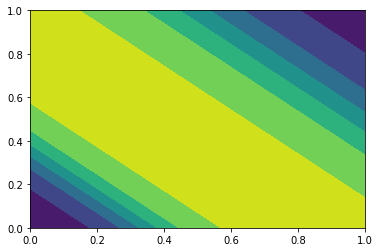

In [5]:
decisionboundary(xormodel)